In [1]:
## import packages, and conventional abbrev.
import numpy as np
import scipy as sp
import matplotlib 
import matplotlib.pyplot as plt

## for math display
from IPython.display import display, Markdown

from mpl_toolkits import mplot3d # for 3D coordinates
%matplotlib inline

## We plot vectors in three dimensions. With Python, we define a vector as a numpy array of six dimension v = [a1, a2, a3, b1,b2,b3], where $(a_1,a_2,a_3)$ is the initial point, and $(b_1,b_2,b_3)$ the terminal point. We plot the three standard basis vectors $\mathbf{i},\ \mathbf{j},\ \mathbf{k}$ below.

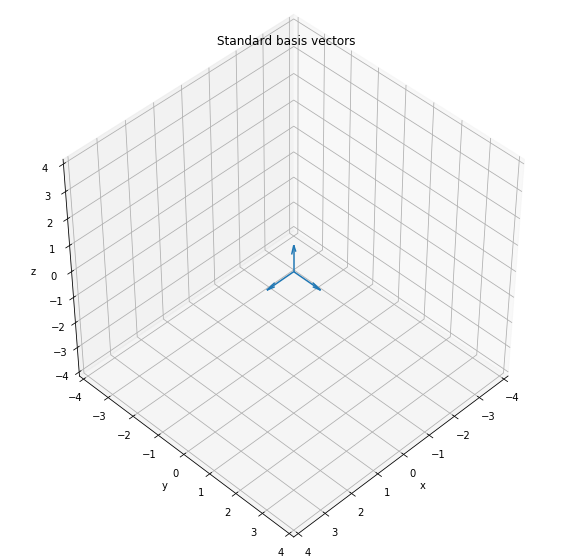

In [2]:
vectors=np.array( [ [0,0,0,1,0,0], [0,0,0,0,1,0],[0,0,0,0,0,1]])
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
for vector in vectors:
    v = np.array([vector[3],vector[4],vector[5]])
    vlength=np.linalg.norm(v)
    ax.quiver(vector[0],vector[1],vector[2],vector[3],vector[4],vector[5],
            pivot = 'tail',length = vlength,arrow_length_ratio=.3/vlength)
ax.set_xlim([-4,4])
ax.set_ylim([-4,4])
ax.set_zlim([-4,4])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# view_init() can be used to rotate the axes
# Syntax: view_init(elev, azim)
# Parameters: 
# ‘elev’ stores the elevation angle in the z plane.
# ‘azim’ stores the azimuth angle in the x,y plane.
ax.view_init(45, 45)
ax.set_title('Standard basis vectors')
plt.show()

## As we know, the cross product of two vectors in 3d produces a vector in 3d. This is computed by np.cross(a,b) in numpy. 

The cross product vector should be perpendicular to both vectors $\mathbf{a}$ and $\mathbf{b}$. 

We also know the cross product obeys the right hand rule, so $\mathbf{a}\times \mathbf{b}$ and $\mathbf{b}\times \mathbf{a}$ are opposite in direction. We will plot these below.

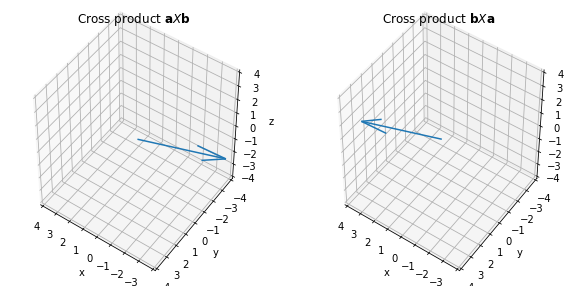

In [3]:
a = [0,-2,-1,1,0,2]
b = [0,-1,0,0,1,0]

# make vectors in standard form for cross product
aVec = np.asarray(a[3:]) - np.asarray(a[:3])
bVec = np.asarray(b[3:]) - np.asarray(b[:3])

# cross product of a and b
c = np.cross(aVec,bVec)
d = np.cross(bVec,aVec)

fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(121, projection='3d')
ax.quiver(0,0,0,c[0],c[1],c[2],pivot = 'tail')
ax.set_xlim([-4,4])
ax.set_ylim([-4,4])
ax.set_zlim([-4,4])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(45, 125)
ax.set_title('Cross product $\mathbf{a}X\mathbf{b}$')

ax = fig.add_subplot(122, projection='3d')
ax.quiver(0,0,0,d[0],d[1],d[2],pivot = 'tail')
ax.set_xlim([-4,4])
ax.set_ylim([-4,4])
ax.set_zlim([-4,4])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(45, 125)
ax.set_title('Cross product $\mathbf{b}X\mathbf{a}$')
plt.show()

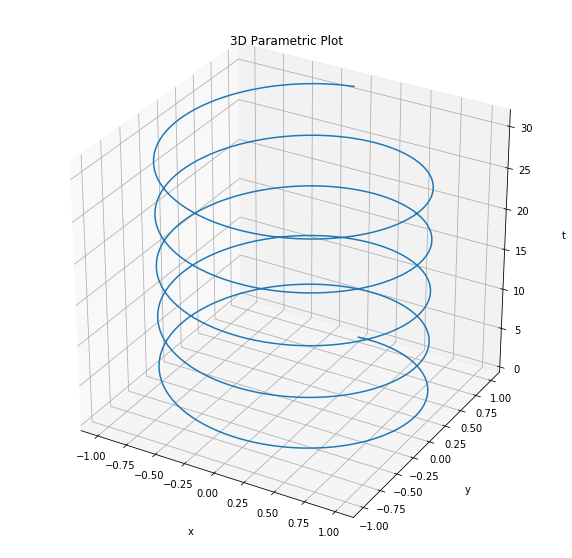

In [4]:
# Plot a curve
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()
t = np.arange(0, 10*np.pi, np.pi/50)
x = np.sin(t)
y = np.cos(t)

ax.plot3D(x, y, t)
ax.set_title('3D Parametric Plot')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('t', labelpad=20)

plt.show()

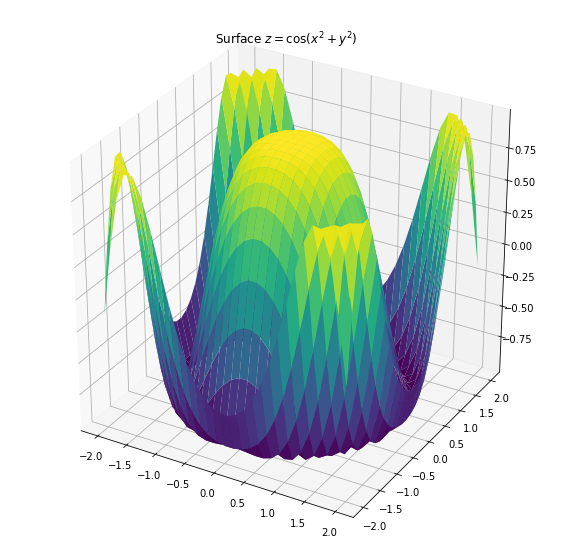

In [5]:
# Plot a surface
x = np.outer(np.linspace(-2, 2, 30), np.ones(30)) # outer product 
y = x.copy().T # transpose
z = np.cos(x ** 2 + y ** 2) # define surface 

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface $z = \cos(x^2 + y^2)$')
plt.show()

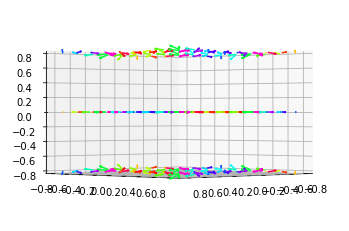

In [9]:
# Making a 3d quiver plot 

# Make the grid
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))

# Make the direction data for the arrows
u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
     np.sin(np.pi * z))

# Color by azimuthal angle
c = np.arctan2(v, u)
# Flatten and normalize
c = (c.ravel() - c.min()) / c.ptp()
# Repeat for each body line and two head lines
c = np.concatenate((c, np.repeat(c, 2)))
# Colormap
c = plt.cm.hsv(c)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.quiver(x, y, z, u, v, w, colors=c, length=0.1, normalize=True)
ax.view_init(45, 45)
plt.show()